<a href="https://colab.research.google.com/github/sureshakukkaje/Python/blob/master/Tweets_Analysis_using_Tweepy_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
# import necessary packages
import numpy as np
import pandas as pd
import tweepy as tw
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob import TextBlob
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# get Twitter connection keys from your Twitter account
consumer_key='mMxWtFrsc1ZH852lpM0MSOYDl'
consumer_secret='T0Fn40YQKLEEFF4iemOmoIpN2v1Bxz3zmzlky0WFfpHi47B0b7'
access_token='298436620-cuJ8a4VCJTPFLPzJMqGclJQu0EqHTpjdE21I4l3c'
access_token_secret='MJKAtZpMCLyyAD9EekIQ6g1nyBfUXn5DjgUyS1vjT6ZGJ'

In [0]:
# connect to Twitter API using OAuthHandler
auth=tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tw.API(auth,wait_on_rate_limit=True)

In [117]:
# display the latest 20 tweets from the homepage
public_tweets=api.home_timeline()
for tweet in public_tweets:
  print(tweet.text)

Before #NewTraffic#Rules, truck driver was fined Rs. 6 lakh in Odisha https://t.co/abgec7RD3P https://t.co/x1NRbKdvYQ
Inaugurated the Kishori Mohan Das Memorial Public Stage at Dakshin Barsajai Maidam Durga Mandir, Lalmati along with… https://t.co/V08UI3T4Dd
Visited the exhibition gallery showcasing the journey of Hon'ble PM Shri @narendramodi and his commitment for the w… https://t.co/4urjnl03ll
One smart, creative idea can make a huge difference. @PLGreenChalleng has selected five finalists – each one workin… https://t.co/ZkuKEG2iOO
Now we have Mr. Akshay Kulkarni, Lead Data Scientist, Sapient who will be sharing his knowledge on the topic of Int… https://t.co/lvu4l6AWE3
Lindner believes music helps him connect with the people better and is key to a #diplomat’s success

https://t.co/S8SRYrWSdJ
The genetic analysis of a 4,500 year old skeleton that belonged to a woman from #Rakhigarhi, the largest town in th… https://t.co/mF9mC8GEJF
आप सभी को #हिंदी_दिवस की हार्दिक बधाई एवं शुभकामनाएं

In [118]:
# get Twitter user details such as screen name and followers counts
user=api.get_user('@sureshkukkaje')
print("User Screen Name")
print(user.screen_name)
print("User Followers Count")
print(user.followers_count)

User Screen Name
sureshkukkaje
User Followers Count
97


In [119]:
# find friends' screen names
user=api.get_user('@shinuabhi')
print("User Screen Name")
print(user.screen_name)
print("User Followers Count")
print(user.followers_count)

User Screen Name
shinuabhi
User Followers Count
328


In [120]:
for friend in user.friends():
  print(friend.screen_name)

isro
Bhuvan_Bam
satyanadella
nikesharora
VivekKundra
vkhosla
nixxin
vijayshekhar
denharsh
vsikka
ramavshree
deepaklalan
sgmammen
kanchanbell
tinucherian
PratibhaNair5
ANSHU_live
Bharadwaaj_S
HnShylaja
connectvj


In [121]:
# find followers screen names
for followers in user.followers():
  print(followers.screen_name)

pradmishra1
Bengaluru2050
sureshkukkaje
Satyaji27316446
ChetanNiloor
Prakash14238074
HarishK79713526
SNEHASISHBANIK6
brajeshonline
kabirsingh27121
manmohandoijode
Kirthiraj191
tinucherian
Vinumakino
CelebrityPhani
Nithya_tweet
sureshhp1
rmadhukar
TilakMuthusamy
saumyadipsarkar


In [122]:
# post a Tweet using Python
api.update_status("Sample Tweet from #Python and #Tweepy")

Status(_api=<tweepy.api.API object at 0x7fa5ef514748>, _json={'created_at': 'Sat Sep 14 09:01:30 +0000 2019', 'id': 1172797509653147648, 'id_str': '1172797509653147648', 'text': 'Sample Tweet from #Python and #Tweepy', 'truncated': False, 'entities': {'hashtags': [{'text': 'Python', 'indices': [18, 25]}, {'text': 'Tweepy', 'indices': [30, 37]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://github.com/sureshakukkaje" rel="nofollow">Suresha</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 298436620, 'id_str': '298436620', 'name': 'Suresha Kukkaje', 'screen_name': 'sureshkukkaje', 'location': 'Bengaluru', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 97, 'friends_count': 410, 'listed_count': 0, 'created_at': 'Sat May 14 09:36:05 +0000 2011', 'favourites_count'

In [0]:
# pull the latest Tweets on any topics by using the cursor method and removing the re-Tweets
tweets=tw.Cursor(api.search, q='@isro-filter:retweets',lang='en',since='2019-01-01').items(1000)

In [125]:
# pull the text of the Tweets using list comprehension
tweets_text = [x.text for x in tweets]
tweets_text

['@BangaloreMirror @NASA @isro Prayer of crores of Indians will come up shortly.',
 '@Being_Wendigo @TeamYouTube @YouTubeIndia @isro @YouTube I hope after my tweet to @YouTube @YouTubeIndia… https://t.co/y50SSzDsyx',
 '@isro Must Check sabotage angle https://t.co/ypl0EOF6S2',
 '@isro @ISRO_News we many achieve a communication contact with  lander and Vikram today..',
 '@AmhiDombivlikar @starindia @narendramodi @isro @Dev_Fadnavis @RahulGandhi @aajtak @ZeeNews @aliaa08 @akshaykumar… https://t.co/9RI3ZrczsN',
 '@isro why dont we think in different way to land on moon \nproperly the landers lands on four legs , create four esc… https://t.co/MB1tq1sJha',
 '@isro I respect for this Scientists.....\nGreet man....',
 '@TweetsOfVipin @NASA @isro @ANI @IndianExpress @narendramodi This screen shot was probably during the time when lan… https://t.co/q6nG4bQ2fu',
 'That’s really great news 👍🏼👍🏼\n@NASA @isro https://t.co/E90gbgrPDG',
 '@DodgerSpace @TeamYouTube @YouTubeIndia @isro @YouTube Video is

In [126]:
# find the total number of tweets fetched
len(tweets_text)

295

In [127]:
# pull a particular Tweet
print(tweets_text[0])
print(tweets_text[7])

@BangaloreMirror @NASA @isro Prayer of crores of Indians will come up shortly.
@TweetsOfVipin @NASA @isro @ANI @IndianExpress @narendramodi This screen shot was probably during the time when lan… https://t.co/q6nG4bQ2fu


In [128]:
# pull Tweets by search words
tweets = tw.Cursor(api.search, q='hdfc card offers-filter:retweets', lang="en", since = '2019-04-01').items(10)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

['Exclusive Offer for HDFC Card Holders!\nOrder #Coolwinks Eyeglasses &amp; Sunglasses &amp; get Extra 50% Off* when you pay u… https://t.co/Sn0YepPbjz',
 '@talktodebu Hi, we wish to inform that, HDFC Bank offers several promotional offers such as Smart EMI, Insta Jumbo… https://t.co/aj2rGRR0ru',
 'Launch offers include no-cost EMIs up to 12 months. HDFC Bank Credit and Debit card users can avail offers up to Rs… https://t.co/5VtRNZ3Kvh',
 '@HDFC_Bank i am using Hdfc credit card, i applied for this card 3 yrs back till now there is no such offers provide… https://t.co/Es7yVF7fmz',
 '@Flipkart Why axis bank? How many people have axix card? At least hdfc or sbi or even icici debit card..y icici cre… https://t.co/ZyPrz1hDxT',
 'BookMyShow : Get 15% discount up to INR 100 for Movies and Non-Movies\n\nThis offer can be availed twice a month\xa0and… https://t.co/5pu82Nx8C9',
 "A new website, a new app, more offers for credit card holders...what's happening at HDFC Bank? Too much competition?

In [129]:
# pull Tweets by hashtags
tweets = tw.Cursor(api.search, q = '#miband4-filter:retweets', lang="en", since='2019-04-01').items(10)
tweets_text = [tweet.text for tweet in tweets]
tweets_text

["#MiBand4 Killer: #Lenovo Carme Smartwatch is here, check out who's better!\n\n#DCTech \nhttps://t.co/h7swx5M0g2",
 'Is it a yes or no for the #MiBand4? Know now!\n\n#DCTech\nhttps://t.co/1PLfhwYV1U',
 '#miband4 when is going to lunch',
 '@BrochureLive Retweet Done ☑️\n#ContestAlert\n#Winners #win #AmazonGiftCard #MiBand4 #mifan #xiaomiindia #Xiaomi… https://t.co/cMRwqvCLGo',
 '#Xiaomi #MiBand4: 10 reasons why Mi Band 4 seems like a great upgrade over Mi Band 3 https://t.co/zflvrslv6f… https://t.co/Rw4eZHDYg1',
 '@BrochureLive Retweet done ✅✅\n\n#ContestAlert #Winners #win #AmazonGiftCard #MiBand4 #mifan #xiaomiindia #Xiaomi… https://t.co/NpkJ5EdFQ8',
 'Mi Band 4 India: Expected price, specifications and all you need to know \n#MiBand4\nhttps://t.co/ANz6KWmUOS',
 'Watch the latest video, enter the giveaway to win #MiBand4 https://t.co/aIotFdAuSj 💥💥💥✌️ https://t.co/jI7a6VTLHE',
 'Huami and Mi are among the most popular wearable brands that never fail to fascinate users with attractive 

In [134]:
# find user and location info
tweets = tw.Cursor(api.search, q='#iphone-filter:retweets', lang="en", since='2019-04-01').items(1000)
users = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users
location = pd.DataFrame(data=users, columns=['Screen_Name', "Location"])
location

,Screen_Name,Location
0,DigitalDealerCo,
1,vernesgo,Manila
2,SpamMagnetBot,
3,AJavedSoofi,Karachi
4,empire_cheats,
5,dynamicportrai1,"Ticino, Switzerland"
6,JRajharan,"Tamil Nadu, India"
7,The_Proc,"Amsterdam, North Holland"
8,Ulrich_S_Design,"Cape Town, South Africa"
9,radim_kacer,


In [0]:
# let's begin with NLP related activities on 1000 Tweets
tweets = tw.Cursor(api.search, q='india economy-filter:retweets', lang="en", since = '2019-04-01').items(1000)
tweets_text = [tweet.text for tweet in tweets]

In [0]:
tweets_text = pd.read_csv("tweets.csv")

In [165]:
tweets_text.info()
tweets_text.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Unnamed: 0    1000 non-null int64
Tweets        1000 non-null object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


,Unnamed: 0,Tweets
0,0,'PM @narendramodi will create more efficiency ...
1,1,The central government had no outstanding #loa...
2,2,Why Modi government 2.0 might have to change i...
3,3,@BhavikaKapoor5 Whenever and wherever the gove...
4,4,India’s growth rate ‘much weaker than expected...


In [170]:
tweets1 = tweets_text.Tweets
tweets1.head()

0    'PM @narendramodi will create more efficiency ...
1    The central government had no outstanding #loa...
2    Why Modi government 2.0 might have to change i...
3    @BhavikaKapoor5 Whenever and wherever the gove...
4    India’s growth rate ‘much weaker than expected...
Name: Tweets, dtype: object

In [0]:
from nltk.corpus import stopwords

In [0]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 1000): # iterate through the list of 1000 tweets
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  tweets1_cln = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',tweets1[i])
  # convert all words to lower case
  tweets1_cln = tweets1_cln.lower()
  # split sentences into words
  tweets1_cln = tweets1_cln.split()
  # remove English stop words
  tweets1_cln = [x for x in tweets1_cln if not x in stop_words]
  # stem words to the base form
  #tweets_text_cln = [ps.stem(x) for x in tweets_text_cln]
  # join words to form the original sentences 
  tweets1_cln = " ".join(tweets1_cln)
  # append to the list to get all Tweets in one place
  corpus.append(tweets1_cln)

In [0]:
bagofwords = []
for i in range(0,1000):
  words = corpus[i].split()
  bagofwords.append(words)
  

In [176]:
bagofwords[0]

['pm', 'create', 'efficiency', 'economy']

In [178]:
# leverage itertools and collection to count frequency
all_words = list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['pm', 'create', 'efficiency', 'economy', 'central', 'government', 'outstanding', 'loans', 'week', 'earlier']

Most commonly occuring words and frequency


[('india', 426),
 ('economy', 399),
 ('indias', 132),
 ('indian', 64),
 ('modi', 57),
 ('growth', 54),
 ('amp', 53),
 ('much', 48),
 ('economic', 48),
 ('trillion', 44),
 ('government', 35),
 ('via', 35),
 ('expected', 35),
 ('people', 35),
 ('dont', 34),
 ('world', 34),
 ('imf', 34),
 ('one', 33),
 ('billion', 33),
 ('weaker', 32)]

In [0]:
words_to_remove = ['india', 'economy', 'indian', 'much', 'amp']
bagofwords_new = [[x for x in word if not x in words_to_remove] for word in bagofwords]

In [180]:
all_words = list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("Most commonly occuring words and frequency\n")
words_freq = collections.Counter(all_words)
words_freq.most_common(20)

['pm', 'create', 'efficiency', 'central', 'government', 'outstanding', 'loans', 'week', 'earlier', 'well']

Most commonly occuring words and frequency



[('indias', 132),
 ('modi', 57),
 ('growth', 54),
 ('economic', 48),
 ('trillion', 44),
 ('government', 35),
 ('via', 35),
 ('expected', 35),
 ('people', 35),
 ('dont', 34),
 ('world', 34),
 ('imf', 34),
 ('one', 33),
 ('billion', 33),
 ('weaker', 32),
 ('pakistan', 32),
 ('minister', 32),
 ('govt', 31),
 ('gdp', 31),
 ('trade', 29)]

In [188]:
freq_word_df = pd.DataFrame(words_freq.most_common(20), columns=['Wrds', 'Freq'])
freq_word_df.head()

,Wrds,Freq
0,indias,132
1,modi,57
2,growth,54
3,economic,48
4,trillion,44


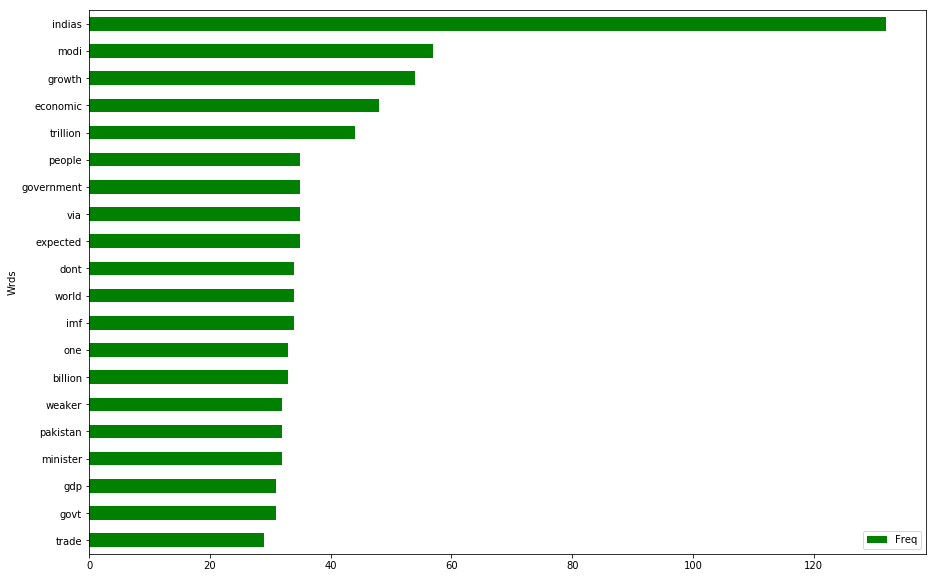

In [189]:
fig,ax = plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='Freq').plot.barh(x= 'Wrds', y = 'Freq', ax=ax,color="green")
plt.show();

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(freq_word_df.Wrds)
wordcloud = WordCloud(#stopwords=STOPWORDS,
                     background_color='black',
                     max_words=20
                     ).generate(word_string)

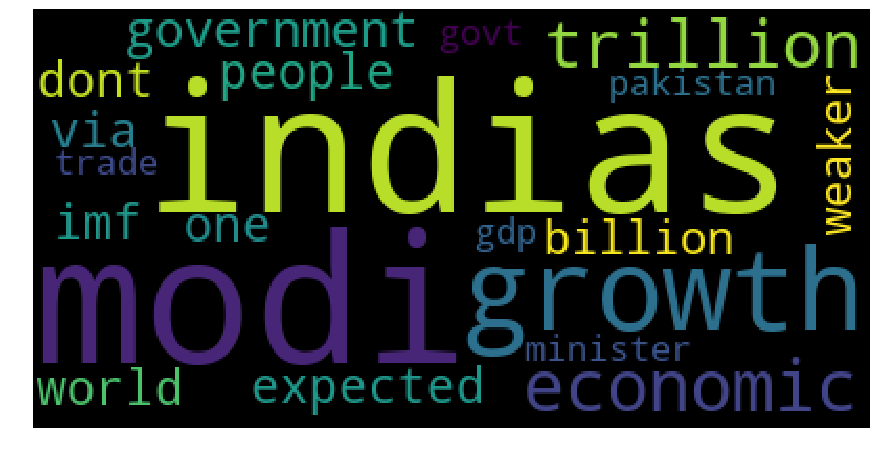

In [193]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [194]:
sentiment_text = [TextBlob(tweet) for tweet in corpus]
print(sentiment_text[0].polarity)
print(sentiment_text[0])

0.0
pm create efficiency economy


In [195]:
sentiments = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity", "Tweet_Text"])
sentiment_df.sort_values(by='Polarity', ascending=False)

,Polarity,Tweet_Text
321,1.000000,feeling concerned economy government india try...
941,1.000000,itc best company india going economy india fin...
993,1.000000,thinking indias economy rising excellent
424,1.000000,best please vote bjp coming election aap suppo...
56,0.933333,india must determine best economy billion indi...
54,0.900000,india must determine best economy billion indi...
58,0.800000,madam country withyou worries india amp econom...
664,0.800000,gandhi great ask king n pm concentrate crumbli...
751,0.800000,u must studied madarsepakistans economy great ...
618,0.800000,great effort tons gold reached england britain...


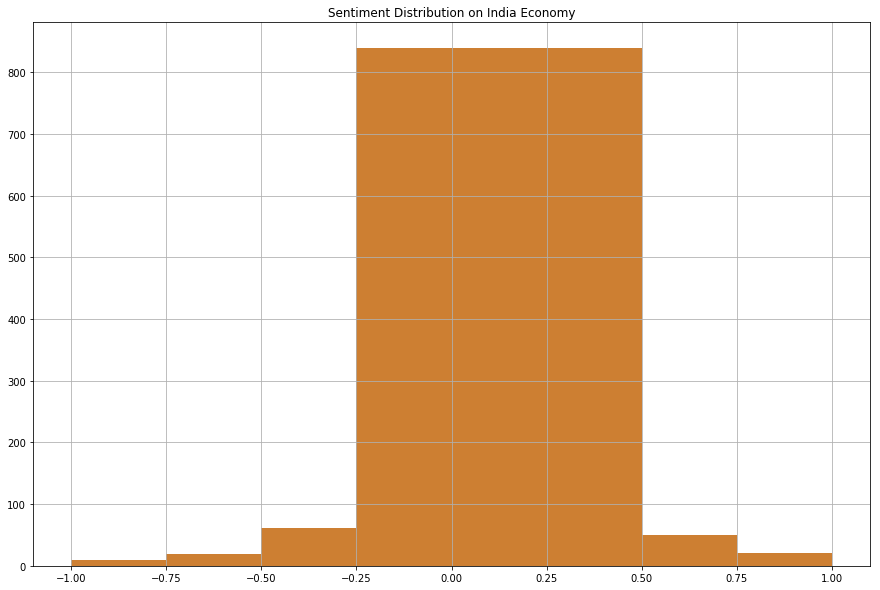

In [196]:
fig, ax = plt.subplots(figsize=(15, 10))
# plot histogram of the polarity values
sentiment_df.hist(bins=[-1,-0.75,-0.5,-0.25,0.5,0.75,1], ax=ax, color="#CD7F32")
plt.title("Sentiment Distribution on India Economy")
plt.show();